In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [108]:
df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [110]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [111]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [112]:
df.duplicated().sum()

0

In [113]:
df['SUBDIVISION'].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [114]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [115]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [116]:
df.head(25)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.200000,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.60000,3373.2000,136.3,560.300000,1696.3,980.300000
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.200000,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.50000,3520.7000,159.8,458.300000,2185.9,716.700000
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.000000,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.00000,2957.4000,156.7,236.100000,1874.0,690.600000
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.000000,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.10000,3079.6000,24.1,506.900000,1977.6,571.000000
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.300000,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.70000,2566.7000,1.3,309.700000,1624.9,630.800000
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.000000,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.20000,2534.4000,36.6,556.100000,1465.8,475.900000
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.300000,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.60000,3347.9000,110.7,751.200000,1327.1,1158.900000
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.000000,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.90000,3576.4000,106.0,591.000000,2303.7,575.700000
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.300000,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.50000,2899.4000,49.3,520.100000,1701.0,629.000000
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.000000,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.10000,2687.2000,8.4,449.800000,1553.6,675.400000


In [117]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [118]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [119]:
df.shape

(4116, 19)

#Data visualization

In [120]:
# sns.pairplot(df)

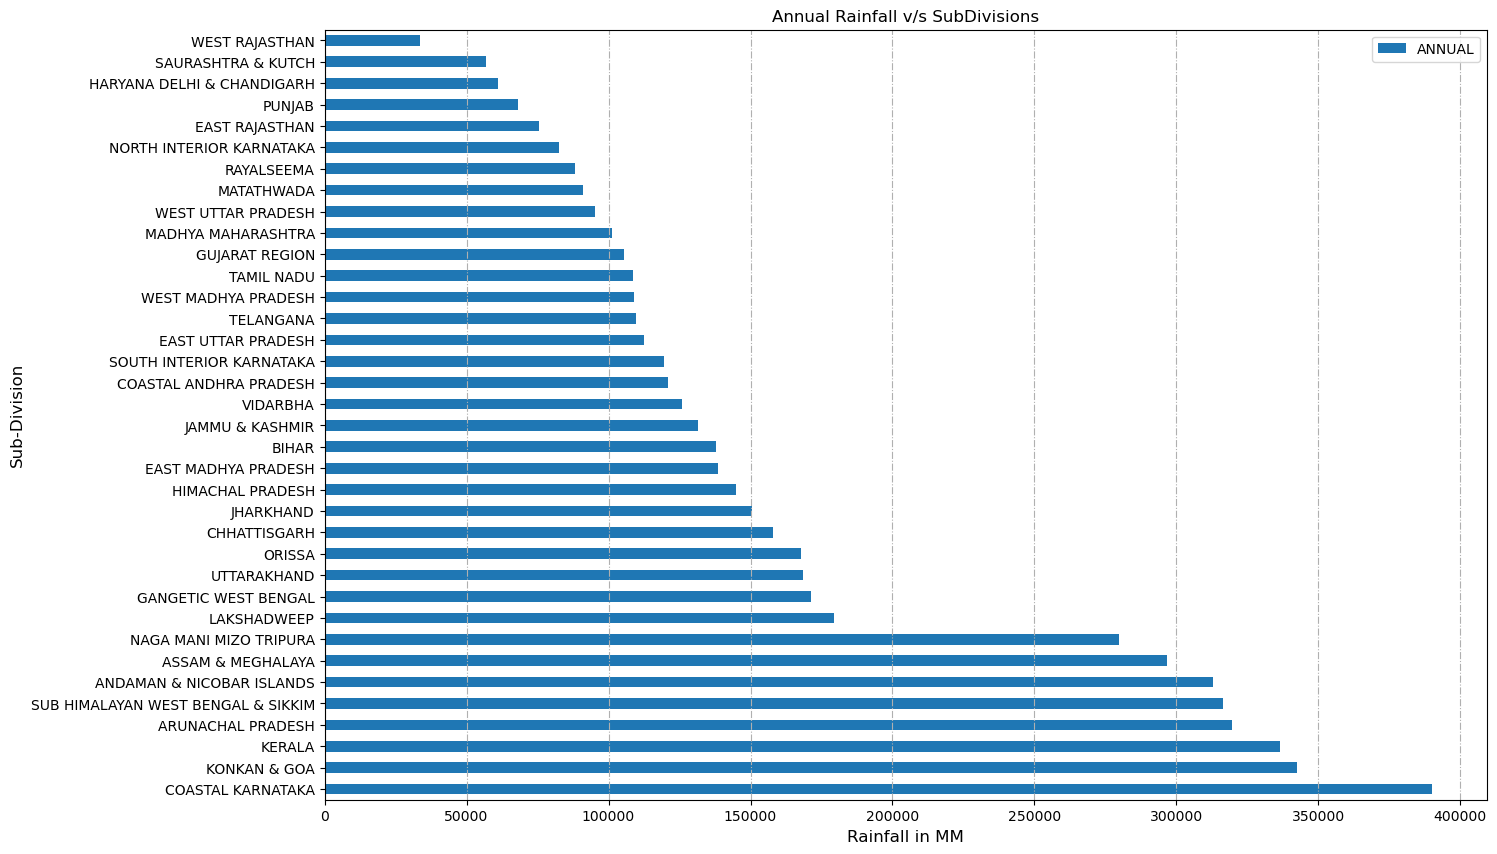

In [121]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

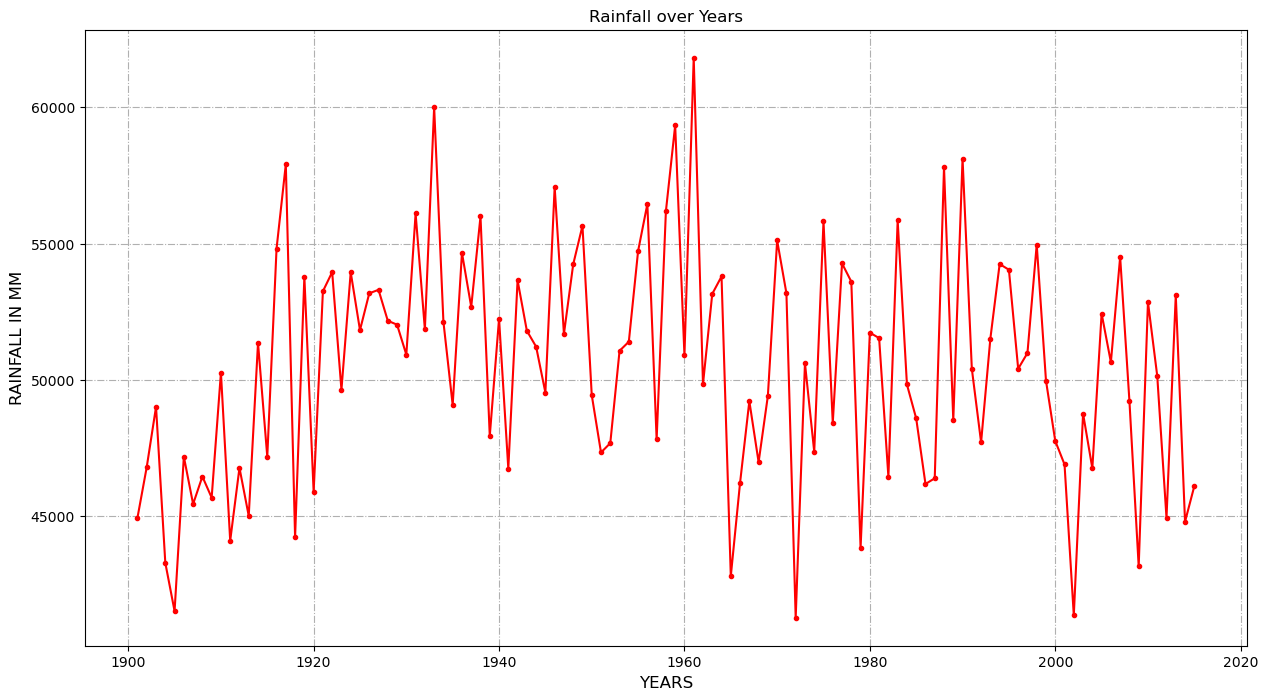

In [122]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
charts = plt.show()

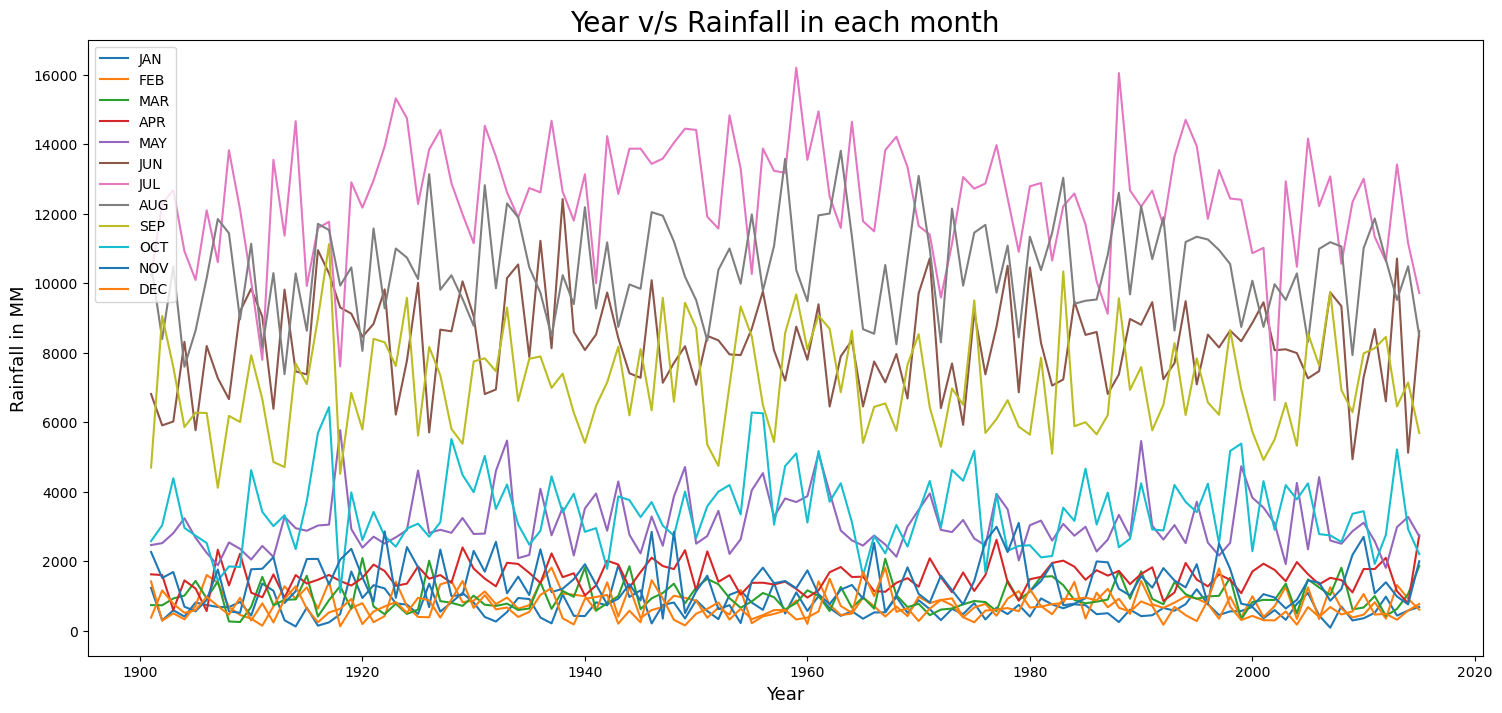

In [123]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

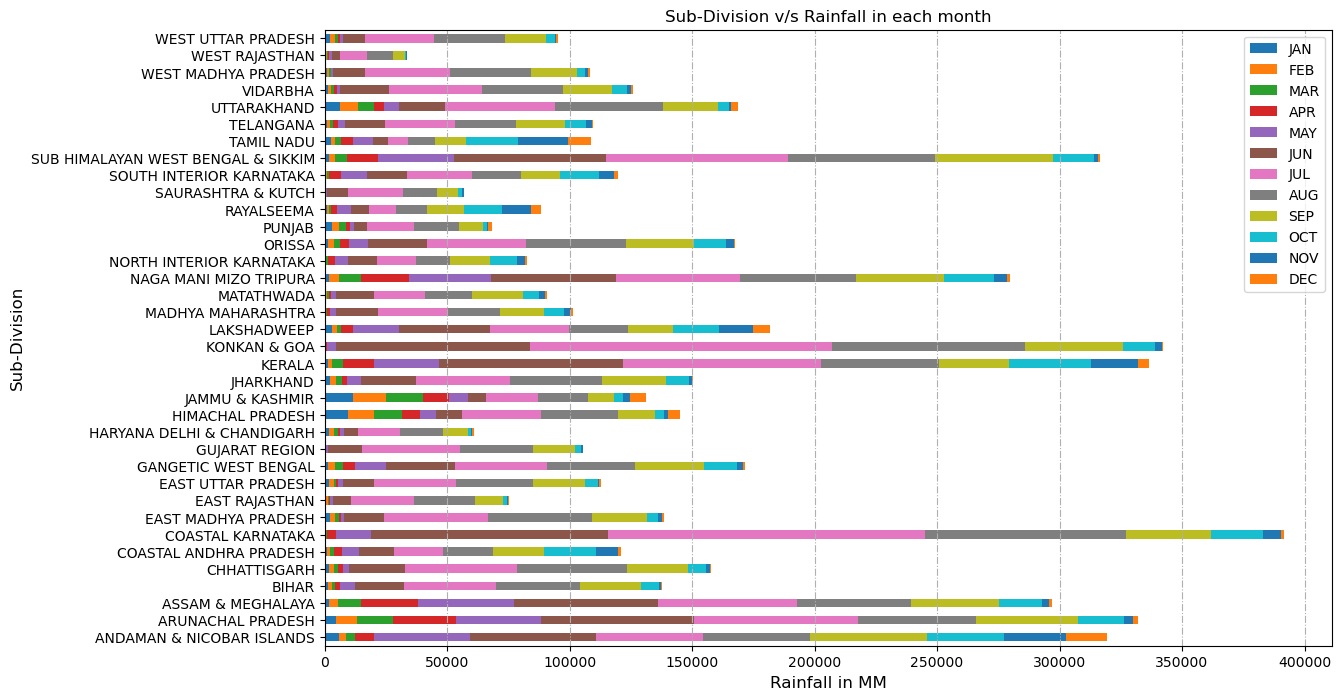

In [124]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

##Analysis of rainfall in blr

In [125]:
V = df.loc[((df['SUBDIVISION'] == 'SOUTH INTERIOR KARNATAKA'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3772,SOUTH INTERIOR KARNATAKA,1901,4.9,31.8,3.0,32.7,109.6,106.0,210.0,109.2,140.8,170.1,72.5,12.3,1003.0,36.8,145.4,566.0,254.9
3773,SOUTH INTERIOR KARNATAKA,1902,1.9,0.5,6.7,42.6,97.7,91.7,210.0,82.1,138.4,219.1,44.6,84.9,1020.1,2.4,147.0,522.3,348.5
3774,SOUTH INTERIOR KARNATAKA,1903,0.3,0.0,1.1,11.6,125.1,129.7,284.4,155.7,197.1,154.2,186.6,24.1,1269.9,0.3,137.7,766.9,364.9
3775,SOUTH INTERIOR KARNATAKA,1904,1.0,0.5,5.2,43.5,144.7,167.9,197.1,73.2,89.6,120.4,2.5,0.3,845.8,1.5,193.3,527.8,123.2
3776,SOUTH INTERIOR KARNATAKA,1905,1.7,7.9,14.2,23.6,118.6,95.9,148.4,140.6,43.1,142.8,22.4,0.3,759.4,9.5,156.5,427.9,165.5


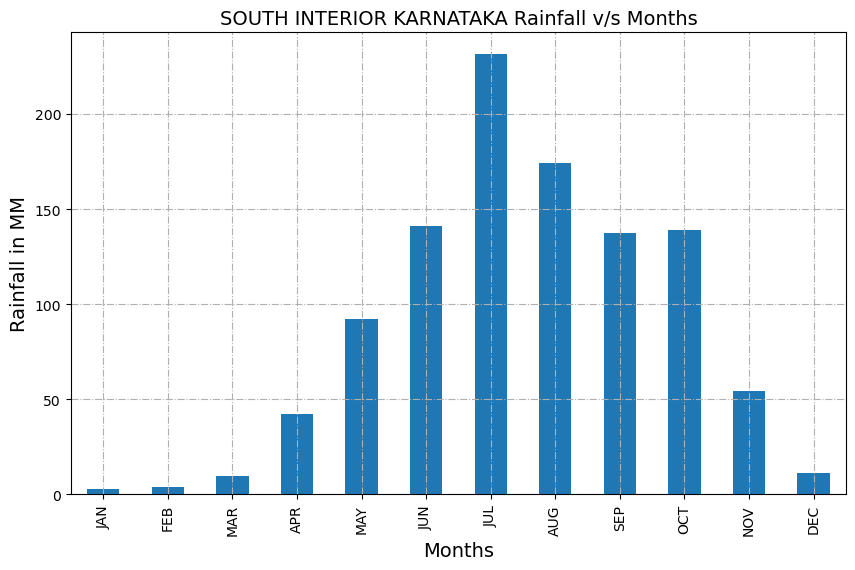

In [126]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("SOUTH INTERIOR KARNATAKA Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

From the above graph we observe that the karnataka has good amount of rainfall in Jul and Aug

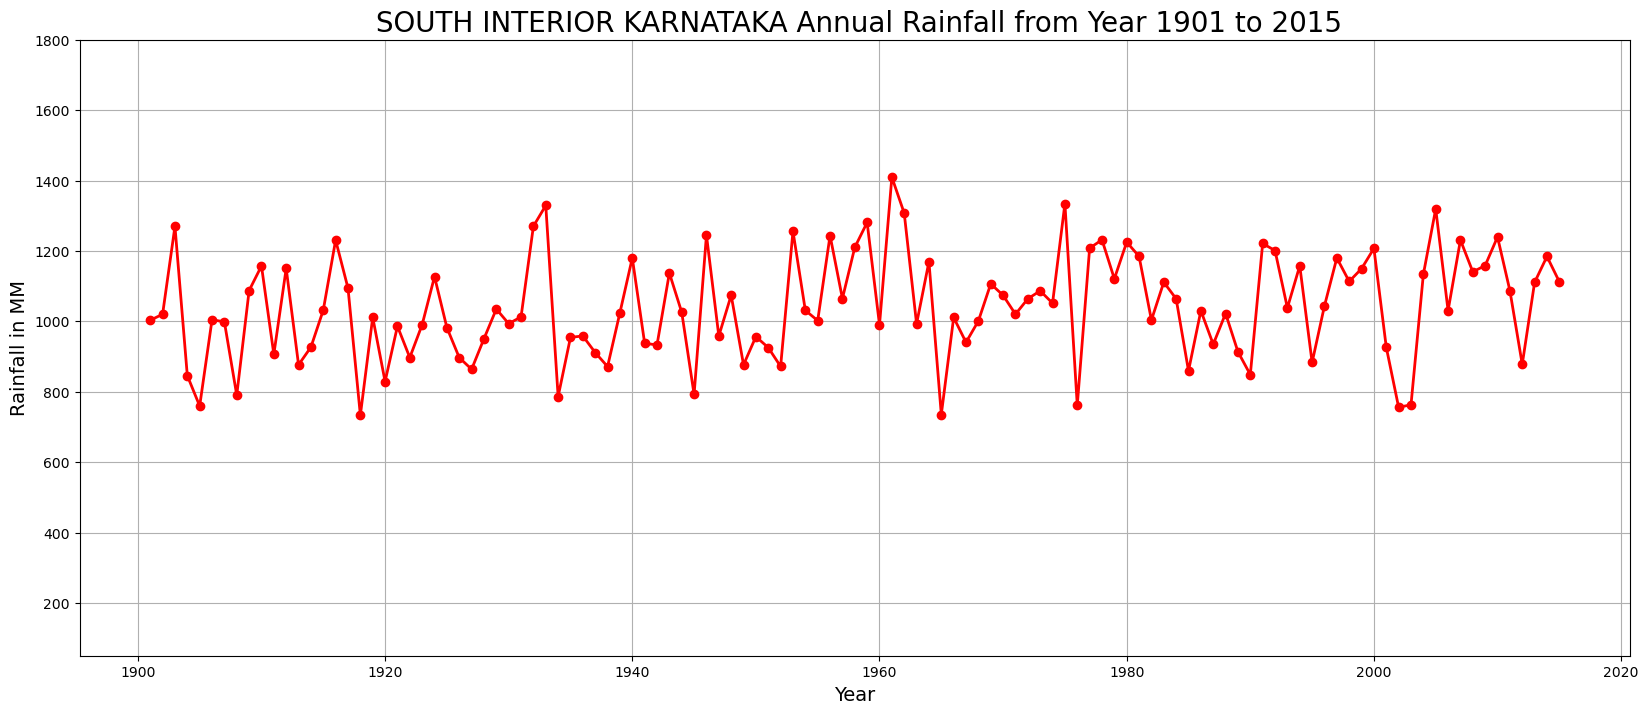

In [127]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8))
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title(' SOUTH INTERIOR KARNATAKA Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()


from the above graph er observe that:- 1. the lowest rainfal in karntaka south interior was noted in 1960 and 2. the higest rainfall was noted in 1960

modeling

In [128]:
group = df.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
df = group.get_group('SOUTH INTERIOR KARNATAKA')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3772,1901,4.9,31.8,3.0,32.7,109.6,106.0,210.0,109.2,140.8,170.1,72.5,12.3
3773,1902,1.9,0.5,6.7,42.6,97.7,91.7,210.0,82.1,138.4,219.1,44.6,84.9
3774,1903,0.3,0.0,1.1,11.6,125.1,129.7,284.4,155.7,197.1,154.2,186.6,24.1
3775,1904,1.0,0.5,5.2,43.5,144.7,167.9,197.1,73.2,89.6,120.4,2.5,0.3
3776,1905,1.7,7.9,14.2,23.6,118.6,95.9,148.4,140.6,43.1,142.8,22.4,0.3


In [129]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,4.9
1,1,1902,JAN,1.9
2,2,1903,JAN,0.3
3,3,1904,JAN,1.0
4,4,1905,JAN,1.7


In [130]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,4.9
115,115,1901,FEB,31.8
230,230,1901,MAR,3.0
345,345,1901,APR,32.7
460,460,1901,MAY,109.6


In [131]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [132]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [133]:
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,4.9
115,115,1901,FEB,31.8
230,230,1901,MAR,3.0
345,345,1901,APR,32.7
460,460,1901,MAY,109.6


In [134]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,4.9
115,115,1901,2,31.8
230,230,1901,3,3.0
345,345,1901,4,32.7
460,460,1901,5,109.6
575,575,1901,6,106.0
690,690,1901,7,210.0
805,805,1901,8,109.2
920,920,1901,9,140.8
1035,1035,1901,10,170.1


In [135]:
df2.drop(columns="Index",inplace=True)

In [136]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,4.9
115,1901,2,31.8


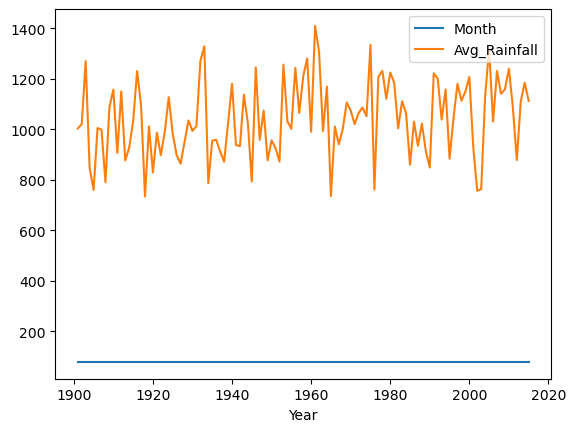

In [137]:
df2.groupby("Year").sum().plot()
plt.show()

In [138]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int') 

In [139]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2015,   10],
       [2015,   11],
       [2015,   12]])

In [140]:
X[:-15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2014,    7],
       [2014,    8],
       [2014,    9]])

In [141]:
y

array([  4,  31,   3, ..., 106, 138,   4])

In [142]:
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


# splitting the dataset into training and testing

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [144]:
X_train

array([[1959,    4],
       [1986,   10],
       [1993,    4],
       ...,
       [1944,   12],
       [1996,   10],
       [2008,    6]])

In [145]:
y_train

array([ 25,  79,  22, ...,   6, 132, 149])

# Linear regression model

In [146]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [147]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [148]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 64.30171629939383
MSE: 6620.104633126587
RMSE: 81.36402542356534
Explained Variance Score: 0.0380558749675598 2

-------Train Data--------
MAE: 63.60660224657008
MSE: 6398.9604916116205
RMSE: 79.99350280873828

-----Training Accuracy-------
12.0
-----Testing Accuracy--------
3.8


In [149]:
predicted = LR.predict([[2014,2]])

In [150]:
predicted

array([54.26089868])

# random Forest Model

In [151]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [152]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [153]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 31.169272814825828
MSE: 1958.9979646626878
RMSE: 44.26056895999743

-------Train Data--------
MAE: 24.16123762144808
MSE: 1278.755538588656
RMSE: 35.75969153374587


In [154]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
82.39999999999999
-----------Testing Accuracy------------
71.5


In [155]:
predicted = random_forest_model.predict([[2014,2]])

In [159]:
predicted

array([15.76977974])

In [157]:
predicted = random_forest_model.predict([[2004,3]])

In [158]:
predicted

array([15.76977974])

#svm

In [160]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [161]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [162]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 88.31159420289855
MSE: 14680.942028985508
RMSE: 121.16493729204629

-------Train Data--------
MAE: 85.7463768115942
MSE: 14624.036231884058
RMSE: 120.92988146808074


In [163]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
12.0
-----------Testing Accuracy------------
10.5


In [165]:
# predicted = svm_regr.predict([[2004,3]])


# Logistic regression

In [166]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X_train,y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [167]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [168]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 88.1159420289855
MSE: 14665.565217391304
RMSE: 121.1014666194894

-------Train Data--------
MAE: 85.57427536231884
MSE: 14608.036231884058
RMSE: 120.86370932535563


In [169]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
10.9
-----------Testing Accuracy------------
8.3


In [170]:
import pickle
import mlxtend

# gradient boosting REgressor

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [172]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [173]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 30.622682306428988
MSE: 1846.1594144211524
RMSE: 42.966957239501525

-------Train Data--------
MAE: 25.7796794803831
MSE: 1456.8711659114986
RMSE: 38.16898172484431


In [174]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
80.0
-----------Testing Accuracy------------
73.2


In [176]:
predicted = gbr.predict([[2004,3]])
predicted

array([22.89044694])

# xgboost


In [177]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [178]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [179]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 34.48788544692207
MSE: 2238.0515274073014
RMSE: 47.3080492876984

-------Train Data--------
MAE: 10.556471427288447
MSE: 239.46094730693676
RMSE: 15.47452575386195


In [180]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
96.7
-----------Testing Accuracy------------
67.5


In [184]:
predicted = xgb.predict([[2004,3]])
predicted

array([18.765814], dtype=float32)

In [185]:
from mlxtend.regressor import StackingCVRegressor

In [182]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

# Ensembl stacking 

The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [186]:
from mlxtend.regressor import StackingCVRegressor

In [187]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [188]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [189]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 34.12504894224306
MSE: 2316.1883437771153
RMSE: 48.12679444734622

-------Train Data--------
MAE: 26.59766379221464
MSE: 1732.4364611432572
RMSE: 41.62254750905159


In [190]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
76.2
-----------Testing Accuracy------------
66.3


In [191]:
predicted = stack.predict([[2004,3]])
predicted

array([13.196111], dtype=float32)

# hybrid model 2

In [192]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [193]:
y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)

In [194]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 31.01614247478724
MSE: 1946.6214131095458
RMSE: 44.120532783609335

-------Train Data--------
MAE: 23.50314871896734
MSE: 1248.3553237506817
RMSE: 35.33207216893288


In [195]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
82.8
-----------Testing Accuracy------------
71.7


In [198]:
predicted = stack2.predict([[2004,3]])
predicted

array([12.9752109])

In [199]:
from sklearn.metrics import r2_score

In [200]:
score = r2_score(y_test, y_test_predict)

In [201]:
score

0.7171432461018582

# Hybrid Mode


In [202]:
stack3 = StackingCVRegressor(regressors=(LR, random_forest_model,logreg),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack3.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                LogisticRegression(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [203]:
y_train_predict=stack3.predict(X_train)
y_test_predict=stack3.predict(X_test)

In [204]:
print("-----------Training Accuracy------------")
print(round(stack3.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack3.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
82.8
-----------Testing Accuracy------------
71.7


In [206]:
predicted = stack3.predict([[2004,3]])
predicted

array([13.93119063])

# hybrid model 4

In [207]:
stack4 = StackingCVRegressor(regressors=(LR, random_forest_model,gbr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                GradientBoostingRegressor(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [96]:
y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)

In [208]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 30.95212645496367
MSE: 1945.5473599459697
RMSE: 44.10835929782437

-------Train Data--------
MAE: 23.515862857872342
MSE: 1247.7807258827586
RMSE: 35.32393984088919


In [209]:
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
80.4
-----------Testing Accuracy------------
73.3


In [210]:
predicted = stack4.predict([[2004,2]])
predicted

array([9.53092184])

In [211]:
file = open("model.pkl","wb")
pickle.dump(stack4,file)
file.close()